In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.decomposition import PCA

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

In [28]:
hiv = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report.csv")
hiv
hiv = hiv.drop(columns = ['Borough', 'UHF', 'Gender', 'Age', 'Race'])
hiv.head()

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0


In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
hiv_scaled = scaler.fit_transform(hiv)

In [25]:
pca = PCA(n_components=2)
pca.fit(hiv)
hiv_rotated = pca.transform(hiv)

In [38]:
hiv_rotated_df = pd.DataFrame(hiv_rotated, columns = ["PC1","PC2"])
hiv_rotated_df["% Linked to Care"] = hiv['% linked to care within 3 months']
hiv_rotated_df.head()

,PC1,PC2,% Linked to Care
0,-29625.672359,-23885.529446,66
1,-29625.498729,-23886.219015,66
2,-29624.600774,-23887.385882,66
3,-29613.100202,-23175.695251,63
4,-29633.386234,-23890.842228,64


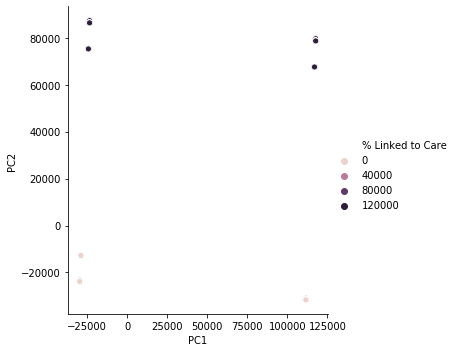

In [39]:
sns.relplot(x = 'PC1', y= 'PC2', hue = '% Linked to Care', data = hiv_rotated_df)

In [40]:
pca2 = PCA(n_components=3)
pca2.fit(hiv)
hiv2_rotated = pca2.transform(hiv)

In [42]:
kmeans = KMeans(n_clusters = 4)
kmeans_clusters = kmeans.fit_predict(hiv_scaled)

In [43]:
hiv2_rotated_df = pd.DataFrame(hiv2_rotated,columns = ["PC1","PC2","PC3"])
hiv2_rotated_df["Cluster"] = kmeans_clusters

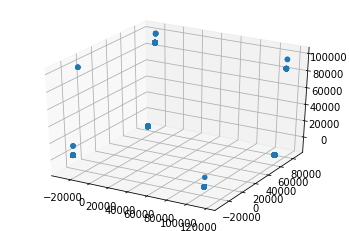

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(hiv2_rotated_df["PC1"], hiv2_rotated_df["PC2"], hiv2_rotated_df["PC3"]);